In [39]:
#imports necessarios
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [40]:
#leitura csv
file = "data.csv"
df = pd.read_csv(file, delimiter=";")
df

,switch,S0,S1,S2,S3
0,S0,NaN,10.0,1.0,1.0
1,S1,10.0,NaN,10.0,0.0
2,S2,1.0,10.0,NaN,0.0
3,S3,1.0,0.0,0.0,NaN


In [41]:
#Lidando com NaN e o index
df.fillna(0, inplace=True)
df = df.set_index("switch")
df = df.astype('int')
df

,S0,S1,S2,S3
switch,,,,
S0,0,10,1,1
S1,10,0,10,0
S2,1,10,0,0
S3,1,0,0,0


In [42]:
# df['S0_regex'] = df['S0'].str.extract(r"\([[0-9][0-9]*)\]", expand=False)
#verifica conexão dos nós
df1 = df != 0
df1

,S0,S1,S2,S3
switch,,,,
S0,False,True,True,True
S1,True,False,True,False
S2,True,True,False,False
S3,True,False,False,False


In [43]:
#colunas: fonte e alvos
source = df1.iloc[:,1:].columns
targets = df1.iloc[:,1:].columns

In [44]:
source

Index(['S1', 'S2', 'S3'], dtype='object')

In [45]:
targets

Index(['S1', 'S2', 'S3'], dtype='object')

In [46]:
#populando os nós e arestas
G =nx.from_pandas_adjacency(df, create_using = nx.Graph())
pos=nx.shell_layout(G)# positions for all nodes

In [47]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 4
Average degree:   2.0000


In [48]:
print("Grau de centralidade")
d = nx.degree_centrality(G)
for v in G.nodes():
    print(f"{v:2} {d[v]:.3f}")

Grau de centralidade
S0 1.000
S1 0.667
S2 0.667
S3 0.333


{('S0',
  'S1'): Text(-0.4999999940375597, -0.5000000437113883, "{'weight': 10}"),
 ('S0', 'S2'): Text(0.0, 4.371138828673793e-08, "{'weight': 1}"),
 ('S0', 'S3'): Text(-0.500000168883119, 0.4999999562886117, "{'weight': 1}"),
 ('S1', 'S2'): Text(0.5000000059624403, -0.4999999125772234, "{'weight': 10}")}

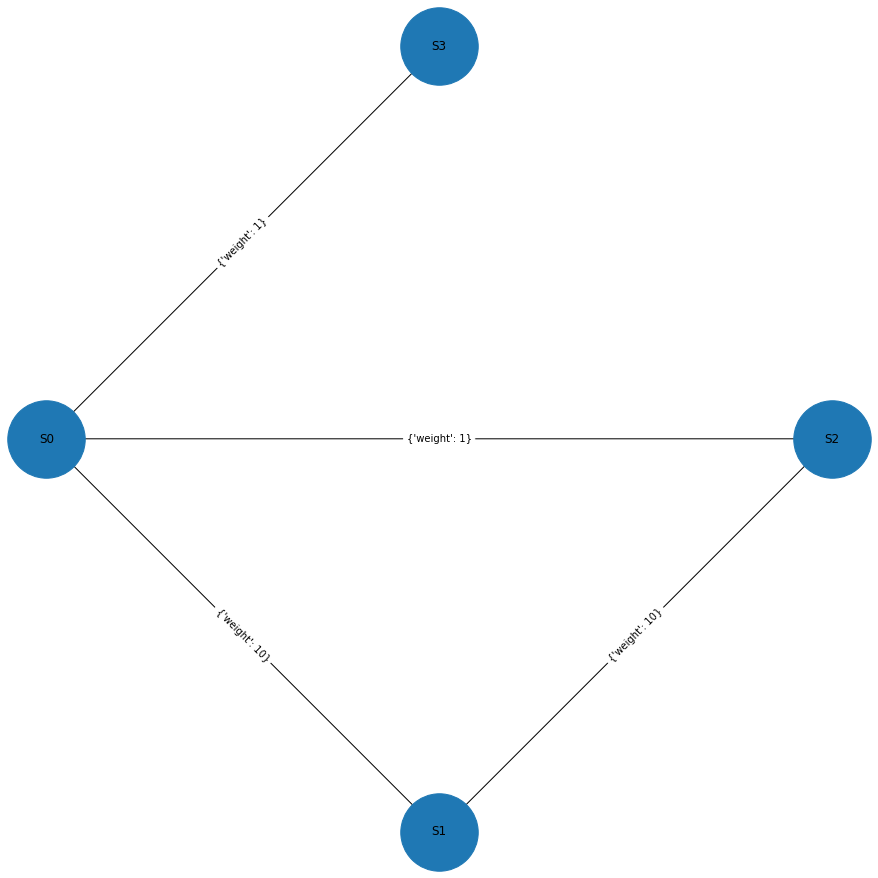

In [49]:
#grafo
figure(figsize=(12,12))
nx.draw_shell(G, with_labels=True, node_size=6000)
nx.draw_networkx_edge_labels(G,pos=pos)

